In [1]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.pipeline import make_pipeline 
from sklearn.cross_validation import cross_val_score 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from itertools import product 
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier 
from nltk.stem.snowball import SnowballStemmer
from sklearn import metrics
import pandas as pd 
import numpy as np 
import re
import itertools
import matplotlib.pyplot as plt
from nltk import WordNetLemmatizer
from nltk import wordnet, pos_tag
import nltk
from nltk.corpus import stopwords
import string
from collections import OrderedDict

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1 Задание

In [2]:
x_ng_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes')).data
x_ng_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes')).data
y_ng_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes')).target          
y_ng_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes')).target
#закачали

x_ng_train = [sent.lower() for sent in x_ng_train]                                                       
x_ng_test = [sent.lower() for sent in x_ng_test]
#все регистры нижние

expr = r'[^\w]'
parser=re.compile(expr)
x_ng_train = [parser.sub(r' ', sent) for sent in x_ng_train]                                             
x_ng_test = [parser.sub(r' ', sent) for sent in x_ng_test]
#выкинул всё лишнее

# 2 Задание

In [3]:
cv = CountVectorizer()
x_cv_matrix = cv.fit_transform(x_ng_train)
cv_clf = SGDClassifier()
#cv_clf.fit(x_ng_train, y_ng_train)
cv_score = cross_val_score(cv_clf, x_cv_matrix, y_ng_train, scoring = 'accuracy').mean()
print(cv_score)

tfidf = TfidfVectorizer()
x_tfidf_matrix = tfidf.fit_transform(x_ng_train)
tfidf_clf = SGDClassifier()
#tfidf_clf.fit(x_ng_train, y_ng_train)
tfidf_score = cross_val_score(tfidf_clf, x_tfidf_matrix, y_ng_train, scoring = 'accuracy').mean()
print(tfidf_score)

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.567882794087


C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.747659270475


In [4]:
%%time
tfidf_score = cross_val_score(tfidf_clf, x_tfidf_matrix, y_ng_train, scoring = 'accuracy').mean()
print(tfidf_score)

0.747570546648
Wall time: 2.99 s


### Как видно, TfidfVectorizer даёт лучее качество. Применим его к тествовой выборке.

In [5]:
%%time
tfidf_clf.fit(x_tfidf_matrix, y_ng_train)
predicted = tfidf_clf.predict(tfidf.transform(x_ng_test))
print(metrics.classification_report(y_ng_test, predicted))
#Ну, собственно мерием точность разными способами выбранного алгорима.

             precision    recall  f1-score   support

          0       0.49      0.51      0.50       319
          1       0.68      0.71      0.70       389
          2       0.64      0.63      0.63       394
          3       0.66      0.66      0.66       392
          4       0.76      0.70      0.73       385
          5       0.81      0.71      0.76       395
          6       0.75      0.81      0.78       390
          7       0.79      0.70      0.74       396
          8       0.78      0.77      0.77       398
          9       0.54      0.83      0.65       397
         10       0.85      0.88      0.87       399
         11       0.85      0.71      0.77       396
         12       0.62      0.58      0.60       393
         13       0.73      0.81      0.76       396
         14       0.72      0.75      0.73       394
         15       0.65      0.81      0.72       398
         16       0.59      0.66      0.63       364
         17       0.82      0.75      0.78   

In [6]:
for i, text in enumerate(np.asarray(x_ng_test[:3])):
    print("\n Predicted_label = {}, True_label = {}\n{}".format(predicted[i], y_ng_test[i], text))
# примеры тестовой выборки с предсказаниями


 Predicted_label = 4, True_label = 7
i am a little confused on all of the models of the 88 89 bonnevilles  i have heard of the le se lse sse ssei  could someone tell me the differences are far as features or performance  i am also curious to know what the book value is for prefereably the 89 model  and how much less than book value can you usually get them for  in other words how much are they in demand this time of year  i have heard that the mid spring early summer is the best time to buy 

 Predicted_label = 1, True_label = 5
i m not familiar at all with the format of these  x face   thingies  but after seeing them in some folks  headers  i ve  got  to  see  them  and maybe make one of my own    i ve got  dpg view  on my linux box  which displays  uncompressed x faces   and i ve managed to compile  un compface too    but now that i m  looking  for them  i can t seem to find any x face  s in anyones news headers        could you  would you  please send me your  x face   header   i  

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

np.set_printoptions(precision=2)
# Функция, которая магическим образом строит матрицу ошибок
#Как говорит Стрижов: "Если что-то есть в интернете, то нагло берём и копипастим себе в код, нечего париться. И благодарим, если считаете нужным"
# Спасибо.

Normalized confusion matrix


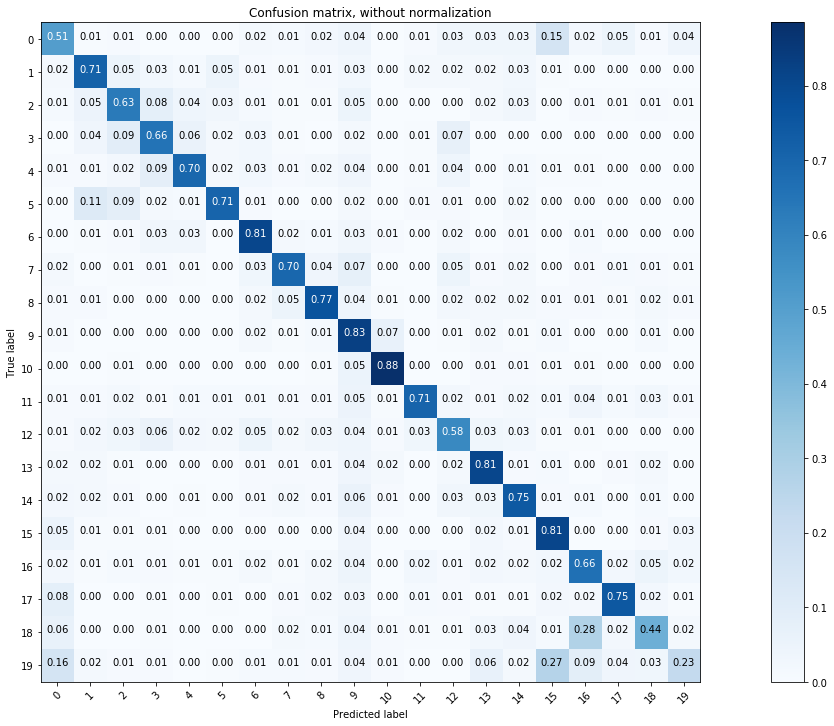

In [8]:
titles = [i for i in range(20)]
cnf_matrix = metrics.confusion_matrix(y_ng_test, predicted)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, classes=titles, normalize=True,
                      title='Confusion matrix, without normalization')

plt.show()

In [9]:
unique, counts = np.unique(predicted, return_counts=True)
dict(zip(titles, counts))

{0: 334,
 1: 405,
 2: 391,
 3: 392,
 4: 351,
 5: 344,
 6: 420,
 7: 350,
 8: 393,
 9: 610,
 10: 415,
 11: 331,
 12: 368,
 13: 439,
 14: 411,
 15: 494,
 16: 408,
 17: 344,
 18: 219,
 19: 113}

# 3 Задание

In [10]:
#стемминг начинается

stemmer = SnowballStemmer(language='english')
x_train_stem = x_ng_train
tfidf = TfidfVectorizer()
clf = SGDClassifier()
#tfidf_clf.fit(x_ng_train, y_ng_train)

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [11]:
%%time

x_train_stem = [' '.join([stemmer.stem(word) for word in document.split()]) for document in x_train_stem]
x_tfidf_stem = tfidf.fit_transform(x_train_stem)
clf.fit(x_tfidf_stem, y_ng_train)

Wall time: 2min 28s


In [12]:
%%time

x_test_tfidf_stem = [' '.join([stemmer.stem(word) for word in document.split()]) for document in x_ng_test]
predicted = clf.predict(tfidf.transform(x_test_tfidf_stem))
print(metrics.classification_report(y_ng_test, predicted))

#как видно, точность не повысилась, а скорость уменьшилась в 42 раза

             precision    recall  f1-score   support

          0       0.58      0.45      0.51       319
          1       0.70      0.71      0.71       389
          2       0.60      0.59      0.60       394
          3       0.67      0.66      0.67       392
          4       0.76      0.71      0.74       385
          5       0.81      0.72      0.76       395
          6       0.76      0.82      0.79       390
          7       0.76      0.73      0.74       396
          8       0.78      0.76      0.77       398
          9       0.55      0.86      0.67       397
         10       0.84      0.91      0.87       399
         11       0.79      0.74      0.77       396
         12       0.62      0.55      0.58       393
         13       0.76      0.81      0.78       396
         14       0.74      0.76      0.75       394
         15       0.64      0.83      0.72       398
         16       0.59      0.68      0.63       364
         17       0.81      0.76      0.78   

In [13]:
x_tfidf_matrix.shape

(11314, 101631)

In [14]:
x_tfidf_stem.shape

(11314, 84435)

In [15]:
#лемматищация пошла

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(treebank_tag):
    my_switch = {
        'J': wordnet.wordnet.ADJ,
        'V': wordnet.wordnet.VERB,
        'N': wordnet.wordnet.NOUN,
        'R': wordnet.wordnet.ADV,
    }
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

def lem_document(document):
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = document.split()
    pos_tagged = [(word, get_wordnet_pos(tag))
                 for word, tag in pos_tag(tokenized_sent)]
    return ' '.join([lemmatizer.lemmatize(word, tag)
                    for word, tag in pos_tagged])
#Лекция(С) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Leon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
%%time
x_train_lem = map(lem_document, x_ng_train)
x_tfidf_lem = tfidf.fit_transform(x_train_lem)
clf.fit(x_tfidf_lem, y_ng_train)

Wall time: 12min 27s


In [17]:
%%time
x_test_lem =  map(lem_document, x_ng_test)
predicted = clf.predict(tfidf.transform(x_test_lem))
print(metrics.classification_report(y_ng_test, predicted))
#точность снова не повысилась, и стал работать ещё хуже (имхо, я не удивлён что ничего не улучшилось,
#т.к. это во-первых английский,в нём мало окончаний в отличие от русского, да и в современном мире всё пишут под английский,
#поэтому скорее всего люди которые писали библы, оптимизировали всё под английский)

             precision    recall  f1-score   support

          0       0.49      0.49      0.49       319
          1       0.71      0.70      0.70       389
          2       0.63      0.58      0.61       394
          3       0.68      0.66      0.67       392
          4       0.78      0.70      0.74       385
          5       0.81      0.73      0.77       395
          6       0.75      0.81      0.78       390
          7       0.76      0.72      0.74       396
          8       0.80      0.76      0.78       398
          9       0.57      0.83      0.67       397
         10       0.85      0.91      0.88       399
         11       0.83      0.71      0.77       396
         12       0.60      0.58      0.59       393
         13       0.76      0.80      0.78       396
         14       0.73      0.76      0.75       394
         15       0.66      0.81      0.72       398
         16       0.56      0.67      0.61       364
         17       0.80      0.77      0.79   

# 4 Задание

In [18]:
nltk.download('stopwords')
sw_eng = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
#удаляю стоп-слова
x_train_clear = x_ng_train
x_test_clear = x_ng_test

x_train_clear = [' '.join([word for word in document.split() if not word in sw_eng]) for document in x_train_clear ]
x_test_clear = [' '.join([word for word in document.split() if not word in sw_eng]) for document in x_test_clear ]

In [20]:
#пишу словарь слов и сортирую его
frequency = {}
for document in x_ng_train:
    for word in document.split():
        if word in frequency.keys():
            frequency[word]+=1
        else:
            frequency.update({word:1})

ordict = OrderedDict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
orlist = sorted(list(zip(frequency.keys(), frequency.values())), key = lambda word: word[1])

In [21]:
#функция по удалению слов
def reduce(sample, side, amount):   
    data = sample.copy() 
    if side == 'bot':
        words = map(lambda x: x[0], orlist[:amount])
    elif side == 'top':
        words = map(lambda x: x[0], orlist[-amount:])
    elif side == 'bot & top':
        words = list(map(lambda x: x[0], orlist[-amount:])) + list(map(lambda x: x[0], orlist[:amount]))    
    words = list(words)
    
    for i, document in enumerate(data):
        data[i] = ' '.join([x for x in data[i].split() if x not in words])
#    print(words)
    return data
 

In [23]:
#исследуем качество, как видно если удалять топ самых часто уподребляемых, то точность уменьшается
%%time

tfidf_score_reduced_top = []

for i in  list(range(1, 101, 50)) + list(range(101, 401, 200)) + list(range(401, 2500, 700)):
    reduced = reduce(x_ng_train, 'top', i)
    x_tfidf_matrix = tfidf.fit_transform(reduced)
    tfidf_clf.fit(x_tfidf_matrix, y_ng_train)
    predicted = tfidf_clf.predict(tfidf.transform(x_ng_test))
    tfidf_score_reduced_top.append(metrics.accuracy_score(y_ng_test, predicted))
    print(metrics.accuracy_score(y_ng_test, predicted))

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.69556558683
0.695167286245
0.697424322889
0.696627721721
0.689192777483
0.66502920871
0.641529474243
Wall time: 11min 33s


In [27]:
%%time

tfidf_score_reduced_bot = []

for i in  list(range(1, 101, 50)) + list(range(101, 401, 200)) + list(range(401, 2500, 700)):
    reduced = reduce(x_ng_train, 'bot', i)
    x_tfidf_matrix = tfidf.fit_transform(reduced)
    tfidf_clf.fit(x_tfidf_matrix, y_ng_train)
    predicted = tfidf_clf.predict(tfidf.transform(x_ng_test))
    tfidf_score_reduced_bot.append(metrics.accuracy_score(y_ng_test, predicted))
    print(metrics.accuracy_score(y_ng_test, predicted))

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Wall time: 10min 12s


In [28]:
%%time

tfidf_score_reduced_top_bot = []

for i in  list(range(1, 101, 50)) + list(range(101, 401, 200)) + list(range(401, 2500, 700)):
    reduced = reduce(x_ng_train, 'bot & top', i)
    x_tfidf_matrix = tfidf.fit_transform(reduced)
    tfidf_clf.fit(x_tfidf_matrix, y_ng_train)
    predicted = tfidf_clf.predict(tfidf.transform(x_ng_test))
    tfidf_score_reduced_top_bot.append(metrics.accuracy_score(y_ng_test, predicted))

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Wall time: 12min 43s


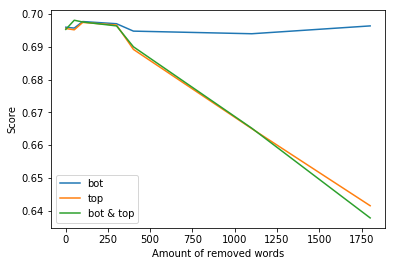

In [29]:
x = list(range(1, 101, 50)) + list(range(101, 401, 200)) + list(range(401, 2500, 700))

plt.plot(x, tfidf_score_reduced_bot, label='bot')
plt.plot(x, tfidf_score_reduced_top, label='top')
plt.plot(x, tfidf_score_reduced_top_bot, label='bot & top')

plt.ylabel('Score')
plt.xlabel('Amount of removed words')

plt.legend()

plt.show()
# Хоба, я не удивлён что удаляя снизу слова, то точность не поменяется, т.к. они не особо учавствуют в обучении (т.к. редкие),
#и очевидно что точность падает, когда мы удаляем топовые по употреблению слова, т.к. на них и завязаны основные связи.

# Дополнительное №1

In [30]:
ngrams = [(1,1), (1,2), (1,3), (2, 3)]

for ngram in ngrams:
    cv = CountVectorizer(ngram_range = ngram)
    x_cv_matrix = cv.fit_transform(x_ng_train)
    cv_clf = SGDClassifier()
    #cv_clf.fit(x_ng_train, y_ng_train)
    cv_score = cross_val_score(cv_clf, x_cv_matrix, y_ng_train, scoring = 'accuracy').mean()
    print(cv_score)

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.591493849004


C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.533438662634


C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.604036665215


C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.474376249032


In [31]:
for ngram in ngrams:
    tfidf = TfidfVectorizer(ngram_range = ngram)
    x_tfidf_matrix = tfidf.fit_transform(x_ng_train)
    tfidf_clf = SGDClassifier()
    #tfidf_clf.fit(x_ng_train, y_ng_train)
    tfidf_score = cross_val_score(tfidf_clf, x_tfidf_matrix, y_ng_train, scoring = 'accuracy').mean()
    print(tfidf_score)

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.746683324037


C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.751635942579


C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.743948574013


C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.627719191331


# Дополнительное №2

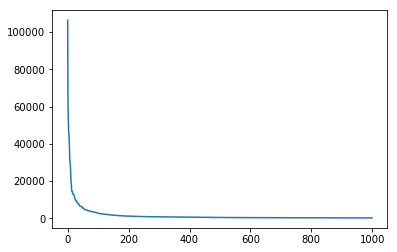

In [42]:
#Закон Ципфа
plt.plot(list(ordict.values())[:1000])
plt.show()
#Вполне таки похоже на гиперболу

In [48]:
#Закон Хипса

amount = len(x_ng_train)
amount_of_words_in_doc = []
amount_of_uni_words_in_doc = []
word_counter = 0

for document in x_ng_train:
    amount_of_words_in_doc.append(document.count(' ') + 1)
#посчитал количество слов в сэмпле

for document in x_ng_train:
    word_counter = 0
    for word in document.split():
        if word in frequency.keys():
            word_counter +=1
    amount_of_uni_words_in_doc.append(word_counter)
#посчитал количество уникальных слов    

C:\Users\Leon\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


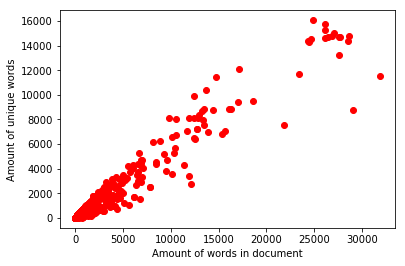

In [51]:
plt.plot(amount_of_words_in_doc, amount_of_uni_words_in_doc, 'ro')

plt.ylabel('Amount of unique words')
plt.xlabel('Amount of words in document')

plt.legend()
plt.show()

#Хрень какая-то